# Combine the soil properties found from GEE 

In [113]:
import pandas as pd

In [114]:
path = '/home/navid/gatechprojects/StochSM/data/smap_calval/raw_soil_grids/{var_name}.csv'
vars = ["ksat",
"sat-field",
"N",
"alpha",
"crit-wilt",
"field-crit",
"ormc",
"stc",
"wcavail",
"wcpf2",
"wcpf3",
"wcpf4-2",
"wcres",
"wcsat"]
multip = 0.0001
calval_sites = pd.read_csv('/home/navid/gatechprojects/StochSM/data/smap_calval/calval_sites.csv')
calval_sites.set_index('Site ID', inplace=True)
var_set = ['Site Name', 'Site ID', 'lat', 'lon', 'IGBPIII Land Cover', 'Climate RegimeII', 'Location',] + vars 

In [115]:
for var in vars:
    fn_in = path.format(var_name = var)
    _data = pd.read_csv(fn_in)[['Site ID', 'first']]
    _data = _data.set_index('Site ID')
    _data[var] = _data['first'] * multip
    calval_sites = calval_sites.merge( _data[var][0:35],on='Site ID')

var_set = ['Site Name', 'Site ID', 'lat', 'lon', 'IGBPIII Land Cover', 'Climate RegimeII', 'Location',] + vars 
# calval_sites.reset_index(inplace=True)
# calval_sites[[var_set]]

In [116]:
var_set

['Site Name',
 'Site ID',
 'lat',
 'lon',
 'IGBPIII Land Cover',
 'Climate RegimeII',
 'Location',
 'ksat',
 'sat-field',
 'N',
 'alpha',
 'crit-wilt',
 'field-crit',
 'ormc',
 'stc',
 'wcavail',
 'wcpf2',
 'wcpf3',
 'wcpf4-2',
 'wcres',
 'wcsat']

In [117]:
calval_sites.reset_index(inplace=True)
# calval_sites.columns[var_set]


In [120]:
calval_sites.to_csv('/home/navid/gatechprojects/StochSM/data/smap_calval/calval_sites_wProps.csv', index = False)

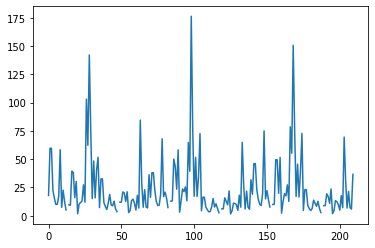

In [37]:
import matplotlib.pyplot as plt
plt.plot(_data['ksat'])

In [18]:
calval_sites

,oid,Site Name,Site ID,Site PI,Location,"Latitude, Longitude (approximate)",Core Site Scales [km]I,Climate RegimeII,IGBPIII Land Cover,References,lat,lon
0,1,Tonzi Ranch,2501,M. Moghaddam,USA (California),"38.43° N, 120.97° W",(Not a core site),Temperate,Savannas woody,"Clewley et al., 2017",38.430,-120.970
1,2,Walnut Gulch*,1601,D. C. Goodrich,USA (Arizona),"31.72° N, 110.68° W","3, 9, 36",Arid,Shrub open,"Keefer et al., 2008",31.720,-110.680
2,3,Reynolds Creek*,401,M. Seyfried,USA (Idaho),"31.72° N, 110.68° W","9, 36",Arid,Grasslands,"Seyfried et al., 2001",31.720,-110.680
3,4,TxSON**,4801,T. Caldwell,USA (Texas),"30.5° N, 98.5° W","3, 9, 36",Temperate,Grasslands,(Not available),30.500,-98.500
4,5,Fort Cobb*,1603,P. J. Starks,USA (Oklahoma),"35.36° N, 98.55° W",36,Temperate,Grasslands,(Not available),35.360,-98.550
5,6,Little Washita*,1602,P. J. Starks,USA (Oklahoma),"34.97° N, 97.97° W","9, 36",Temperate,Grasslands,"Cosh et al., 2006",34.970,-97.970
6,7,South Fork*,1607,M. H. Cosh/J. Prueger,USA (Iowa),"42.44° N, 93.44° W","3, 9, 36",Cold,Croplands,"Coopersmith et al., 2015",42.440,-93.440
7,8,St. Josephs*,1606,S. Livingston,USA (Indiana),"41.449° N, 85.011° W",9,Cold,Croplands,(Not available),41.449,-85.011
8,9,Little River*,1604,D. Bosch,USA (Georgia),"31.64° N, 83.65° W","3, 9, 36",Temperate,Cropland/natural mosaic,"Bosch et al., 2007",31.640,-83.650
9,10,Millbrook,2601,M. Temimi,USA (New York),"41.78° N, 73.73° W",(Not a core site),Cold,Forest deciduous broadleaf,(Not available),41.780,-73.730
